In [3]:
import numpy as np
import os
import pickle
import torch
import torch.nn as nn
from thop import profile
from models.vrnn import *
import matplotlib.pyplot as plt

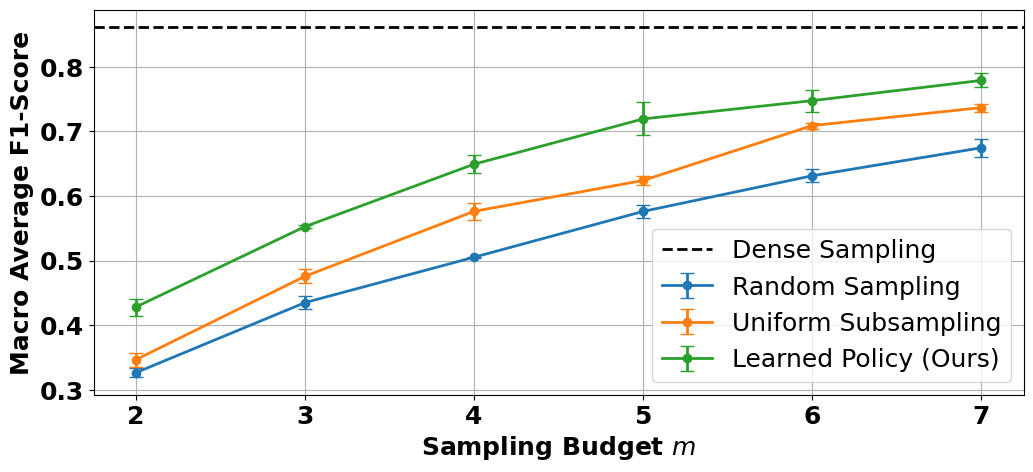

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(12,5))
budgets = [2,3,4,5,6,7,-1]
seeds = [0,1,2]
f1s_sub = {b: [] for b in budgets[:-1]}
f1s_rand = {b: [] for b in budgets[:-1]}
f1s_learn = {b: [] for b in budgets[:-1]}
f1s_dense = []
for seed in seeds:
    for b in budgets:
        # budget of -1 is unconstrained case
        if b == -1:
            result_path = f"../saved_data/results/gesture/vrnn/smartwatch_gesture_lstm32_dense/results_seed{seed}.pickle"
            with open(result_path, 'rb') as f:
                results = pickle.load(f)
            f1s = np.array([results[s][0] for i,s in enumerate(results.keys())])
            f1s_dense.append(np.mean(f1s))
        else:
            result_path = f"../saved_data/results/gesture/vrnn/smartwatch_gesture_lstm32_budget{b}_uniform_subsampling/results_seed{seed}.pickle"
            with open(result_path, 'rb') as f:
                results = pickle.load(f)
            f1s = np.array([results[s][0] for i,s in enumerate(results.keys())])
            f1s_sub[b].append(np.mean(f1s))

            result_path = f"../saved_data/results/gesture/vrnn/learned_policy_budget{b}/results_seed{seed}.pickle"
            with open(result_path, 'rb') as f:
                results = pickle.load(f)
            f1s = np.array([results[s][0] for i,s in enumerate(results.keys())])
            f1s_learn[b].append(np.mean(f1s))

            result_path = f"../saved_data/results/gesture/vrnn/smartwatch_gesture_lstm32_budget{b}_random/results_seed{seed}.pickle"
            with open(result_path, 'rb') as f:
                results = pickle.load(f)
            f1s = np.array([results[s][0] for i,s in enumerate(results.keys())])
            f1s_rand[b].append(np.mean(f1s))



plt.errorbar(f1s_rand.keys(),[np.mean(f1_val) for f1_val in f1s_rand.values()],[np.std(f1_val) for f1_val in f1s_rand.values()],capsize=5,marker='o',label='Random Sampling',linewidth=2)
plt.errorbar(f1s_sub.keys(),[np.mean(f1_val) for f1_val in f1s_sub.values()],[np.std(f1_val) for f1_val in f1s_sub.values()],capsize=5,marker='o',label='Uniform Subsampling',linewidth=2)
plt.errorbar(f1s_learn.keys(),[np.mean(f1_val) for f1_val in f1s_learn.values()],[np.std(f1_val) for f1_val in f1s_learn.values()],capsize=5,marker='o',label='Learned Policy (Ours)',linewidth=2)
plt.axhline(np.mean(f1s_dense),linestyle='--',c='k',label='Dense Sampling',linewidth=2)
# plt.ylim([0,1])
plt.grid()
plt.legend(fontsize=18)
ax.set_xlabel(r"Sampling Budget $m$",fontsize=18,fontweight='bold')
ax.set_ylabel(r"Macro Average F1-Score",fontsize=18,fontweight='bold')
plt.xticks(fontsize=18, fontweight='bold')
plt.yticks(fontsize=18, fontweight='bold')
plt.savefig("gesture_result.pdf",bbox_inches='tight')

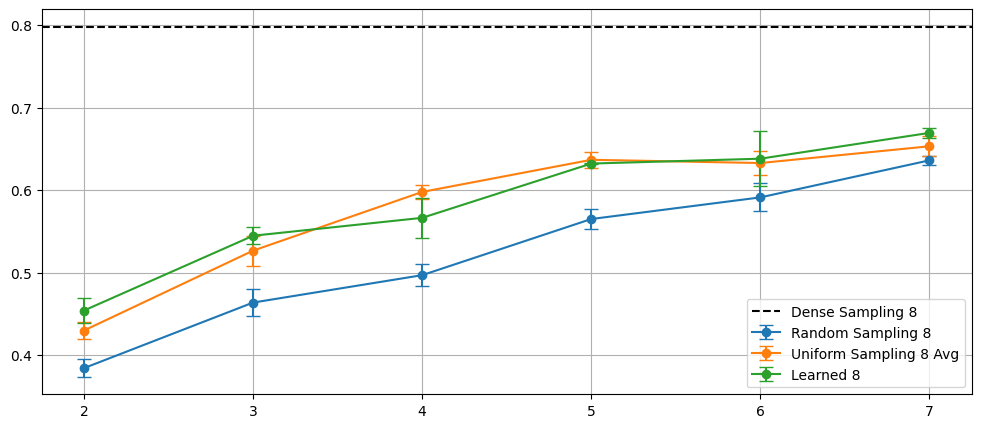

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1,figsize=(12,5))
budgets = [2,3,4,5,6,7,-1]
seeds = [0,1,2]
f1s_sub = {b: [] for b in budgets[:-1]}
f1s_rand = {b: [] for b in budgets[:-1]}
f1s_learn = {b: [] for b in budgets[:-1]}
f1s_dense = []
for seed in seeds:
    for b in budgets:
        if b == -1:
            result_path = f"../saved_data/results/gesture_impair/vrnn/motion_gesture_lstm32_dense/results_seed{seed}.pickle"
            with open(result_path, 'rb') as f:
                results = pickle.load(f)
            f1s = np.array([results[s][0] for i,s in enumerate(results.keys())])
            f1s_dense.append(np.mean(f1s))
        else:

            result_path = f"../saved_data/results/gesture_impair/vrnn/motion_gesture_lstm32_budget{b}_uniform_subsampling/results_seed{seed}.pickle"
            with open(result_path, 'rb') as f:
                results = pickle.load(f)
            f1s = np.array([results[s][0] for i,s in enumerate(results.keys())])
            f1s_sub[b].append(np.mean(f1s))

            result_path = f"../saved_data/results/gesture_impair/vrnn/learned_policy_budget{b}/results_seed{seed}.pickle"
            with open(result_path, 'rb') as f:
                results = pickle.load(f)
            f1s = np.array([results[s][0] for i,s in enumerate(results.keys())])
            f1s_learn[b].append(np.mean(f1s))

            result_path = f"../saved_data/results/gesture_impair/vrnn/motion_gesture_lstm32_budget{b}_random/results_seed{seed}.pickle"
            with open(result_path, 'rb') as f:
                results = pickle.load(f)
            f1s = np.array([results[s][0] for i,s in enumerate(results.keys())])
            f1s_rand[b].append(np.mean(f1s))

plt.errorbar(f1s_rand.keys(),[np.mean(f1_val) for f1_val in f1s_rand.values()],[np.std(f1_val) for f1_val in f1s_rand.values()],capsize=5,marker='o',label='Random Sampling',linewidth=2)
plt.errorbar(f1s_sub.keys(),[np.mean(f1_val) for f1_val in f1s_sub.values()],[np.std(f1_val) for f1_val in f1s_sub.values()],capsize=5,marker='o',label='Uniform Subsampling',linewidth=2)
plt.errorbar(f1s_learn.keys(),[np.mean(f1_val) for f1_val in f1s_learn.values()],[np.std(f1_val) for f1_val in f1s_learn.values()],capsize=5,marker='o',label='Learned Policy (Ours)',linewidth=2)
plt.axhline(np.mean(f1s_dense),linestyle='--',c='k',label='Dense Sampling',linewidth=2)
# plt.ylim([0,1])
plt.grid()
plt.legend(fontsize=18,loc='upper left',bbox_to_anchor=(0, 0.96))
ax.set_xlabel(r"Sampling Budget $m$",fontsize=18,fontweight='bold')
ax.set_ylabel(r"Macro Average F1-Score",fontsize=18,fontweight='bold')
plt.xticks(fontsize=18, fontweight='bold')
plt.yticks(fontsize=18, fontweight='bold')
plt.savefig("gesture_imp_result.pdf",bbox_inches='tight')

---

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

(27,)


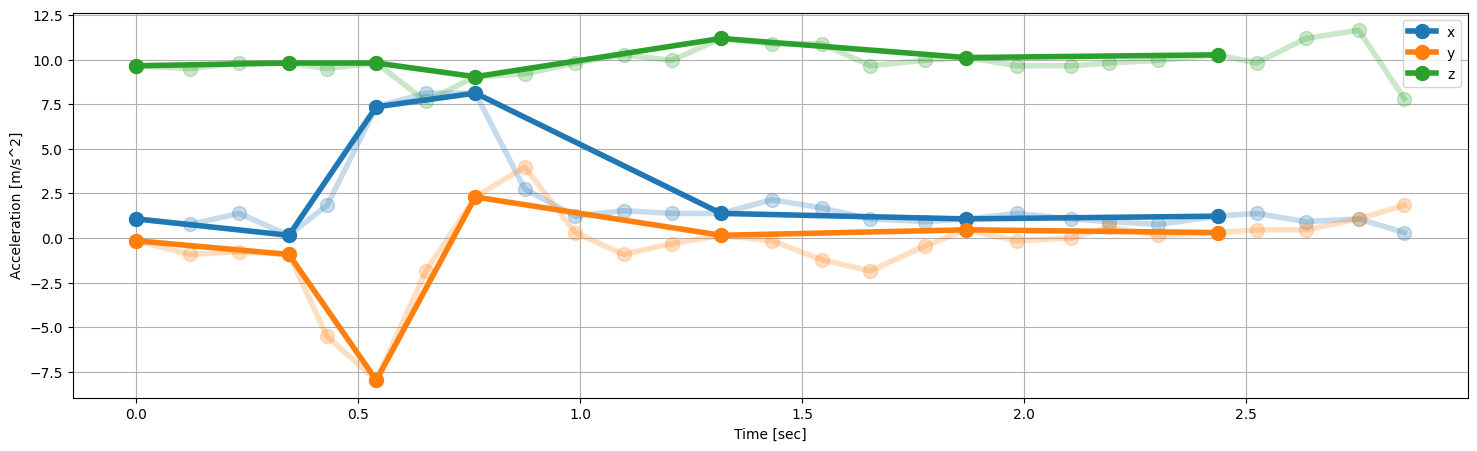

In [22]:
root_dir = "/home/gc28692/Projects/data/gestures-dataset/gestures-dataset"
df = pd.read_csv(os.path.join(root_dir,"U02/02/10.txt"),sep='\s+', header=None)
fig,ax = plt.subplots(1,1,figsize=(18,5),sharex=True,sharey=True)
times = df[0].values
times = (times - times[0])/1000
x = df[3].values
y = df[4].values
z = df[5].values
print(x.shape)


sub_times = times[::3]
sub_x = x[::3]
sub_y = y[::3]
sub_z = z[::3]

ckpt = 2
budg_left = 4
skip1 = 2
skip2 = 2


delay = (x.shape[0]-ckpt-skip1-skip2) // budg_left
rem_time = np.concatenate([sub_times[:ckpt],np.array([times[3+skip1]]),times[3+skip1+skip2:][::delay]])
rem_x = np.concatenate([sub_x[:ckpt],np.array([x[3+skip1]]),x[3+skip1+skip2:][::delay]])
rem_y = np.concatenate([sub_y[:ckpt],np.array([y[3+skip1]]),y[3+skip1+skip2:][::delay]])
rem_z = np.concatenate([sub_z[:ckpt],np.array([z[3+skip1]]),z[3+skip1+skip2:][::delay]])

# ax.set_title("Subsampled Data")
ax.plot(times,x,alpha=0.25,c='tab:blue',linewidth=4,marker='o',markersize=10)
ax.plot(times,y,alpha=0.25,c='tab:orange',linewidth=4,marker='o',markersize=10)
ax.plot(times,z,alpha=0.25,c='tab:green',linewidth=4,marker='o',markersize=10)
ax.plot(rem_time,rem_x,label='x',marker='o',linewidth=4,markersize=10)
ax.plot(rem_time,rem_y,label='y',marker='o',linewidth=4,markersize=10)
ax.plot(rem_time,rem_z,label='z',marker='o',linewidth=4,markersize=10)
# ax[1].scatter(sub_times,sub_x,label='x',marker='o')
# ax[1].scatter(sub_times,sub_y,label='y',marker='o')
# ax[1].scatter(sub_times,sub_z,label='z',marker='o')
ax.grid()
ax.set_ylabel("Acceleration [m/s^2]")
ax.set_xlabel("Time [sec]")
ax.legend()
fig.savefig("compress.svg")

(27,)


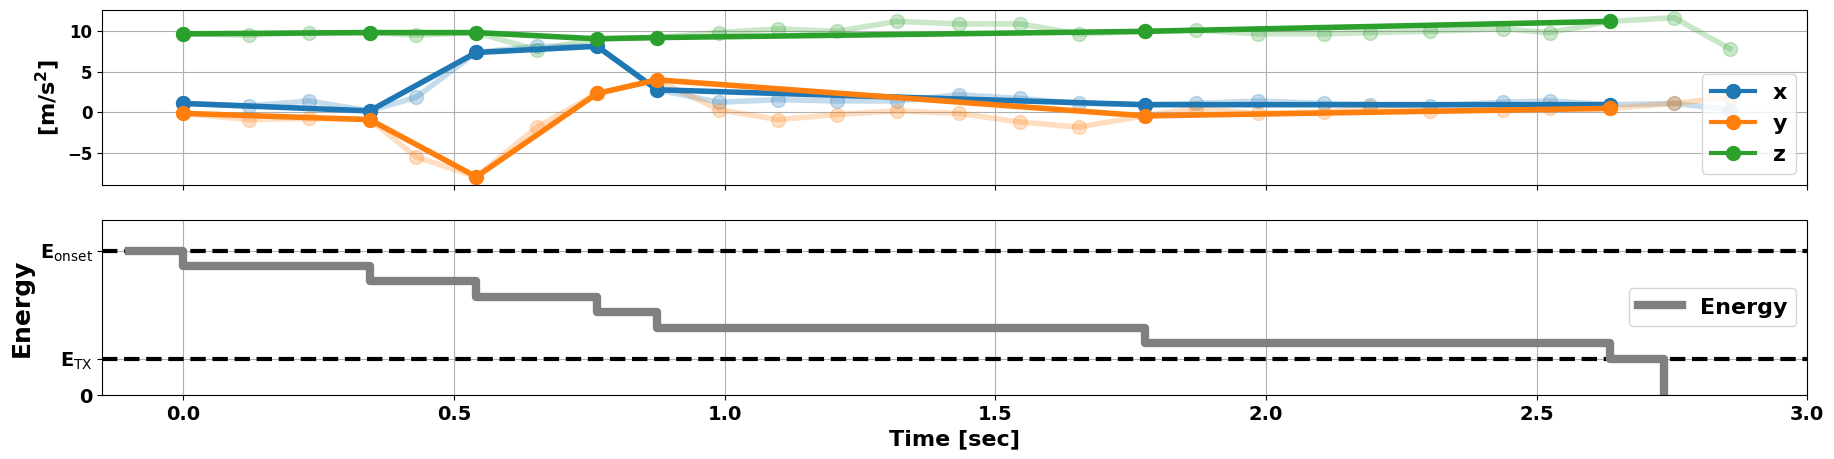

In [71]:
root_dir = "/home/gc28692/Projects/data/gestures-dataset/gestures-dataset"
df = pd.read_csv(os.path.join(root_dir,"U02/02/10.txt"),sep='\s+', header=None)
fig,ax = plt.subplots(2,1,figsize=(22,5),sharex=True,sharey=False)
times = df[0].values
times = (times - times[0])/1000
x = df[3].values
y = df[4].values
z = df[5].values
print(x.shape)


sub_times = times[::3]
sub_x = x[::3]
sub_y = y[::3]
sub_z = z[::3]

ckpt = 2
budg_left = 2
skip1 = 2
skip2 = 2
skip3 = 1


delay = (x.shape[0]-3-skip1-skip2-skip3-2) // budg_left
rem_time = np.concatenate([sub_times[:ckpt],np.array([times[3+skip1]]),np.array([times[3+skip1+skip2]]),np.array([times[3+skip1+skip2+skip3]]),times[3+skip1+skip2+skip3:][delay::delay][:budg_left]])
rem_x = np.concatenate([sub_x[:ckpt],np.array([x[3+skip1]]),np.array([x[3+skip1+skip2]]),np.array([x[3+skip1+skip2+skip3]]),x[3+skip1+skip2+skip3:][delay::delay][:budg_left]])
rem_y = np.concatenate([sub_y[:ckpt],np.array([y[3+skip1]]),np.array([y[3+skip1+skip2]]),np.array([y[3+skip1+skip2+skip3]]),y[3+skip1+skip2+skip3:][delay::delay][:budg_left]])
rem_z = np.concatenate([sub_z[:ckpt],np.array([z[3+skip1]]),np.array([z[3+skip1+skip2]]),np.array([z[3+skip1+skip2+skip3]]),z[3+skip1+skip2+skip3:][delay::delay][:budg_left]])

# ax.set_title("Subsampled Data")
ax[0].plot(times,x,alpha=0.25,c='tab:blue',linewidth=4,marker='o',markersize=10)
ax[0].plot(times,y,alpha=0.25,c='tab:orange',linewidth=4,marker='o',markersize=10)
ax[0].plot(times,z,alpha=0.25,c='tab:green',linewidth=4,marker='o',markersize=10)
ax[0].plot(rem_time,rem_x,label='x',marker='o',linewidth=4,markersize=10)
ax[0].plot(rem_time,rem_y,label='y',marker='o',linewidth=4,markersize=10)
ax[0].plot(rem_time,rem_z,label='z',marker='o',linewidth=4,markersize=10)
# ax[1].scatter(sub_times,sub_x,label='x',marker='o')
# ax[1].scatter(sub_times,sub_y,label='y',marker='o')
# ax[1].scatter(sub_times,sub_z,label='z',marker='o')
ax[0].grid()
ax[0].set_ylabel(r"$\mathbf{[m/s^2]}$",fontsize=16,fontweight='bold')
ax[1].set_xlabel("Time [sec]",fontsize=16,fontweight='bold')
legend = ax[0].legend(prop={'size': 16, 'weight': 'bold'})

t = np.concatenate([np.array([-0.1]),rem_time,np.array([rem_time[-1]+0.1])])
e_steps = np.zeros(t.shape[0])
e_steps[0] = 2*rem_time.shape[0]
e_steps[0:-1] = np.linspace(2*rem_time.shape[0],0.5*rem_time.shape[0],rem_time.shape[0]+1)
e_steps[-1] = 0
ax[1].axhline(2*rem_time.shape[0],linestyle='--',color='k',linewidth=3)
ax[1].axhline(0.5*rem_time.shape[0],linestyle='--',color='k',linewidth=3)
ax[1].step(t, e_steps, where='post', label='Energy', linewidth=6,color='gray')
ax[1].grid()
legend2 = ax[1].legend(prop={'size': 16, 'weight': 'bold'})
ax[0].set_xlim([-0.15,3])
# ax[0].set_ylim([-20,27])
ax[1].set_ylim([0,17])
ax[1].set_yticklabels([])
ax[1].set_ylabel("Energy",fontsize=18,fontweight='bold')
ax[0].tick_params(axis='y', labelsize=12)

yticks = [0, 3.5, 14]
yticklabels = ['0', r'$\mathbf{E_\text{TX}}$', r'$\mathbf{E_\text{onset}}$']
ax[1].set_yticks(yticks, yticklabels,fontsize=18,fontweight='bold')

plt.tick_params(axis='both', which='major', labelsize=14)  # Set fontsize
for label in plt.gca().get_xticklabels() + ax[0].get_yticklabels():
    label.set_fontweight('bold')
for line in legend.get_lines():
    line.set_linewidth(3)
fig.savefig("inference.svg")